In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import (
    ROOTDIR,
    AdjacencyMethod,
    DistanceTransformation,
    Normalizer,
    encode_variables_to_filename,
    read_dataset,
    setup_plotting,  # noqa: F401
)

# setup_plotting()

In [3]:
METRIC_COLUMNS = [
    "global_efficiency",  # x1
    "entropy",  # x2
    "hurst_rs",  # x3
    "fractal",  # x4
    "modularity",  # x5
    "assortativity",  # x6
    "estrada_index",  # x7
    "avg_katz",  # x8
    "avg_closeness",  # x9
    "avg_betweenness",  # x10
    "avg_laplacian",  # x11
]

## Configuration

In [4]:
def get_dataset_filename(
    event_filename: str = "all.txt",
    input_data: bool = False,
    use_threshold: bool = False,
) -> pd.DataFrame:
    filename = encode_variables_to_filename(
        event_filename=event_filename,
        imput_data=input_data,
        use_threshold=use_threshold,
    )

    dataset_df = read_dataset(ROOTDIR / "data" / filename)
    return dataset_df

### Configuration 1

* Default data per event: `event_filename = "all.txt"`
* Without inputing data: `input_data = True`
* If the column have nan, drop it: `use_threshold = True`

In [5]:
event_filename = "all.txt"
input_data = True
use_threshold = True

dataset_df_conf1 = get_dataset_filename(
    event_filename=event_filename,
    input_data=input_data,
    use_threshold=use_threshold,
)

distance_transformation = DistanceTransformation.EXPONENTIAL
norm_method = Normalizer.Z_SCORE
adjacency_method = AdjacencyMethod.MANHATTAN

df0 = dataset_df_conf1[
    (dataset_df_conf1["transformation"] == distance_transformation.value)
    & (dataset_df_conf1["normalization"] == norm_method.value)
    & (dataset_df_conf1["adjacency_method"] == adjacency_method.value)
].sort_values(by="intensity")[[*METRIC_COLUMNS, "intensity"]]

plot_df = df0.melt(id_vars="intensity", var_name="metric", value_name="value")

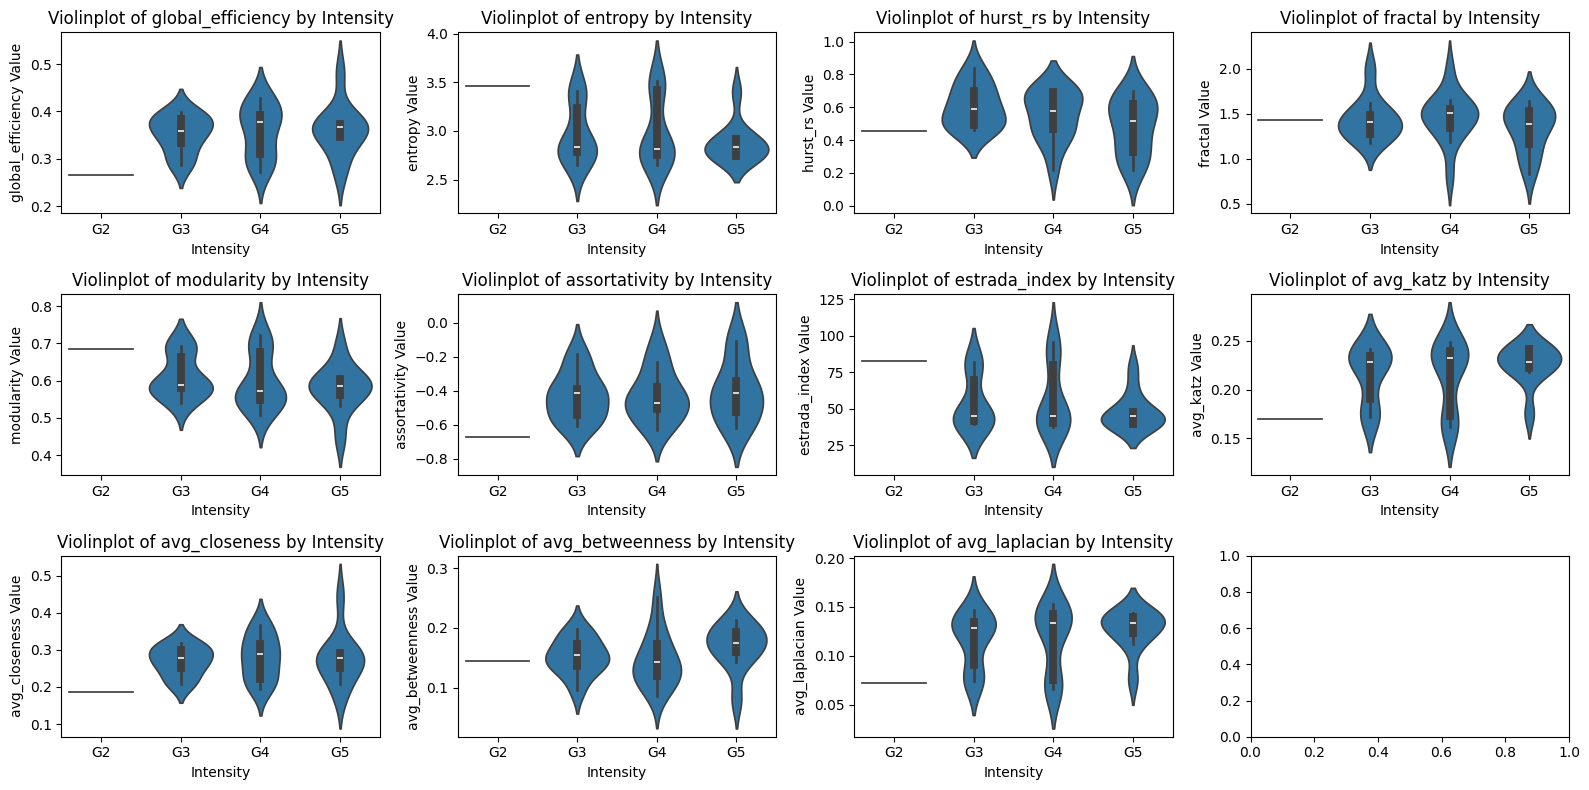

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))

metric = plot_df["metric"].unique()
for metric, ax in zip(metric, axes.flatten()):
    sns.violinplot(
        x="intensity",
        y="value",
        data=plot_df[plot_df["metric"] == metric],
        ax=ax,
    )
    ax.set_title(f"Violinplot of {metric} by Intensity")
    ax.set_xlabel("Intensity")
    ax.set_ylabel(f"{metric} Value")

fig.tight_layout()
plt.show()